# EDA

Exploratory data analysis on the merged datasets.

## Importing modules and data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('viridis')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/train_weather_merged.csv')

### Species

In [3]:
df.species.value_counts()

CULEX PIPIENS/RESTUANS    4723
CULEX RESTUANS            2713
CULEX PIPIENS             2691
CULEX OTHER                313
Name: species, dtype: int64

In [9]:
species_list = ['C. pipiens/restuans', 'C. restuans', 'C. pipiens', 'Other']
species_pct = [df[(df.species == 'CULEX PIPIENS/RESTUANS')]['wnvpresent'].mean(),  
            df[(df.species == 'CULEX RESTUANS')]['wnvpresent'].mean(),
            df[(df.species == 'CULEX PIPIENS')]['wnvpresent'].mean(),
            df[(df.species == 'CULEX OTHER')]['wnvpresent'].mean()]

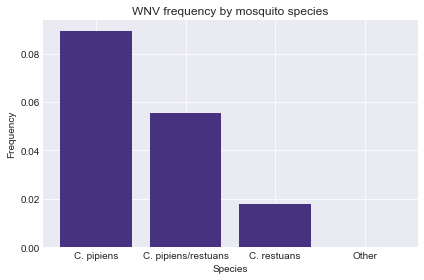

In [21]:
plt.bar(x=species_list, height=species_pct)
plt.title('WNV frequency by mosquito species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.tight_layout()

C. pipiens species was more likely to have WNV compared to other species.

### Latitude

In [28]:
train_weather[train_weather.latitude >= train_weather.latitude.median()]['wnvpresent'].sum()

305

In [29]:
train_weather[train_weather.latitude < train_weather.latitude.median()]['wnvpresent'].sum()

246

In [29]:
x = []
for i in set(df.latitude.values):
    x.append(df[df.latitude == i]['wnvpresent'].mean())

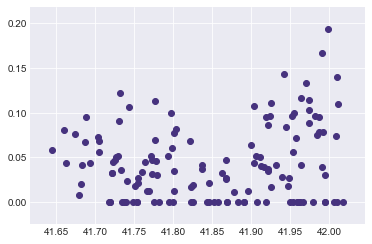

In [45]:
plt.scatter(list(set(df.latitude.values)), x)

**More cases were on the northern side of the city; the bimodal appearance of the distribution is an artifact of the 41.85 latitude being the urban center of the city.**

### Longitude

In [30]:
train_weather[train_weather.longitude >= train_weather.longitude.median()]['wnvpresent'].sum()

223

In [31]:
train_weather[train_weather.longitude < train_weather.longitude.median()]['wnvpresent'].sum()

328

In [ ]:
 = []
for i in set(df.latitude.values):
    x.append(df[df.latitude == i]['wnvpresent'].mean())

More cases were on the eastern side of the city.

### Address Accuracy

In [32]:
train_weather.addressaccuracy.value_counts()

8    4591
9    3953
5    1806
3      90
Name: addressaccuracy, dtype: int64

In [33]:
train_weather[(train_weather.addressaccuracy == 8)]['wnvpresent'].mean()

0.05249401001960357

In [34]:
train_weather[(train_weather.addressaccuracy == 9)]['wnvpresent'].mean()

0.05438907159119656

In [35]:
train_weather[(train_weather.addressaccuracy == 5)]['wnvpresent'].mean()

0.05204872646733112

In [36]:
train_weather[(train_weather.addressaccuracy == 3)]['wnvpresent'].mean()

0.011111111111111112

It looks like fewer of the low-accuracy sites reported West Nile Virus present. Could be a data collection issue?

### Station

In [37]:
train_weather[train_weather.station == 1]['wnvpresent'].mean()

0.06542056074766354

In [38]:
train_weather[train_weather.station == 2]['wnvpresent'].mean()

0.043614736494300345

'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed'

### Temperature

In [39]:
train_weather[train_weather.tmax >= train_weather.tmax.mean()]['wnvpresent'].mean()

0.05108264714852089

In [40]:
train_weather[train_weather.tmax < train_weather.tmax.mean()]['wnvpresent'].mean()

0.05564142194744977

In [41]:
train_weather[train_weather.tmin >= train_weather.tmin.mean()]['wnvpresent'].mean()

0.06573403000168548

In [42]:
train_weather[train_weather.tmin < train_weather.tmin.mean()]['wnvpresent'].mean()

0.035722209895717776

In [43]:
train_weather[train_weather.tavg >= train_weather.tavg.mean()]['wnvpresent'].mean()

0.05837875857218217

In [44]:
train_weather[train_weather.tavg < train_weather.tavg.mean()]['wnvpresent'].mean()

0.04607616242373238

### Dewpoint

In [45]:
train_weather[train_weather.dewpoint >= train_weather.dewpoint.mean()]['wnvpresent'].mean()

0.06333453626849513

In [46]:
train_weather[train_weather.dewpoint < train_weather.dewpoint.mean()]['wnvpresent'].mean()

0.04083299305839118

### Species

In [23]:
train_weather.species.value_counts()

CULEX PIPIENS/RESTUANS    4723
CULEX RESTUANS            2713
CULEX PIPIENS             2691
CULEX OTHER                313
Name: species, dtype: int64

In [24]:
train_weather[(train_weather.species == 'CULEX PIPIENS/RESTUANS')]['wnvpresent'].mean()

0.05547321617615922

In [25]:
train_weather[(train_weather.species == 'CULEX PIPIENS')]['wnvpresent'].mean()

0.08918617614269789

In [26]:
train_weather[(train_weather.species == 'CULEX RESTUANS')]['wnvpresent'].mean()

0.01806118687799484

In [27]:
train_weather[(train_weather.species == 'CULEX OTHER')]['wnvpresent'].mean()

0.0

The pipiens species looks like it is much more likely to have WNV (almost 9%, C. restuans only ~2%, others 0%)

### Latitude

In [28]:
train_weather[train_weather.latitude >= train_weather.latitude.median()]['wnvpresent'].sum()

305

In [29]:
train_weather[train_weather.latitude < train_weather.latitude.median()]['wnvpresent'].sum()

246

More cases were on the northern side of the city.

### Longitude

In [30]:
train_weather[train_weather.longitude >= train_weather.longitude.median()]['wnvpresent'].sum()

223

In [31]:
train_weather[train_weather.longitude < train_weather.longitude.median()]['wnvpresent'].sum()

328

More cases were on the eastern side of the city.

### Address Accuracy

In [32]:
train_weather.addressaccuracy.value_counts()

8    4591
9    3953
5    1806
3      90
Name: addressaccuracy, dtype: int64

In [33]:
train_weather[(train_weather.addressaccuracy == 8)]['wnvpresent'].mean()

0.05249401001960357

In [34]:
train_weather[(train_weather.addressaccuracy == 9)]['wnvpresent'].mean()

0.05438907159119656

In [35]:
train_weather[(train_weather.addressaccuracy == 5)]['wnvpresent'].mean()

0.05204872646733112

In [36]:
train_weather[(train_weather.addressaccuracy == 3)]['wnvpresent'].mean()

0.011111111111111112

It looks like fewer of the low-accuracy sites reported West Nile Virus present. Could be a data collection issue?

### Station

In [37]:
train_weather[train_weather.station == 1]['wnvpresent'].mean()

0.06542056074766354

In [38]:
train_weather[train_weather.station == 2]['wnvpresent'].mean()

0.043614736494300345

'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed'

### Temperature

In [39]:
train_weather[train_weather.tmax >= train_weather.tmax.mean()]['wnvpresent'].mean()

0.05108264714852089

In [40]:
train_weather[train_weather.tmax < train_weather.tmax.mean()]['wnvpresent'].mean()

0.05564142194744977

In [41]:
train_weather[train_weather.tmin >= train_weather.tmin.mean()]['wnvpresent'].mean()

0.06573403000168548

In [42]:
train_weather[train_weather.tmin < train_weather.tmin.mean()]['wnvpresent'].mean()

0.035722209895717776

In [43]:
train_weather[train_weather.tavg >= train_weather.tavg.mean()]['wnvpresent'].mean()

0.05837875857218217

In [44]:
train_weather[train_weather.tavg < train_weather.tavg.mean()]['wnvpresent'].mean()

0.04607616242373238

### Dewpoint

In [45]:
train_weather[train_weather.dewpoint >= train_weather.dewpoint.mean()]['wnvpresent'].mean()

0.06333453626849513

In [46]:
train_weather[train_weather.dewpoint < train_weather.dewpoint.mean()]['wnvpresent'].mean()

0.04083299305839118